# pandas demo

In [ ]:
# Pandas是一款开放源码的BSD许可的Python库，为Python编程语言提供了高性能，易于使用的数据结构和数据分析工具。
#Python Pandas的官方网站是： http://pandas.pydata.org/

#Pandas处理以下三个数据结构 -
# 系列(Series)
# 数据帧(DataFrame)
# 面板(Panel)

In [1]:
# 前置知识： numpy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns
print('==end==')

==end==


# 创建Series

In [2]:
import pandas as pd
a=pd.Series([1,2,3,4,5])
a

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# 添加 index
a=pd.Series([1,2,3,4,5], index=['a','b','c','d','e'], dtype=float);
a

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64

In [4]:
# 使用numpy作为输入
import numpy as np;
a=np.arange(5);
pd.Series(a)

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [5]:
# 使用字典作为输入
dic={'name':'Lee', 'gender':'M', 'age':18}
pd.Series(dic)

name      Lee
gender      M
age        18
dtype: object

In [6]:
# 如果单一数字，则使用单一数字全部填充
pd.Series(5, [0,1,10])

0     5
1     5
10    5
dtype: int64

In [7]:
# 数字要么只有1个，要么和index数量一致，否则报错
pd.Series([3,5], [0,1,10,100])

ValueError: Length of passed values is 2, index implies 4

# 创建 DataFrame

In [8]:
# 指定index行名，columns列名
a=np.random.randint(0,10,(2,3))
pd.DataFrame(a, index=['a', 'b'], columns=['x','y','z'])

,x,y,z
a,8,5,6
b,1,8,8


In [11]:
#例2: 传入字典 
population={'beijing':1000, 'shanghai':1200,'guangzhou':999}
a=pd.Series(population) #字典变 Series
b=pd.DataFrame(a, columns=['population']) #Series变数据框

print(a)
b

beijing      1000
shanghai     1200
guangzhou     999
dtype: int64


,population
beijing,1000
shanghai,1200
guangzhou,999


In [13]:
##【错误】

#直接传入字典会报错，说没有index，但是添加index后，结果也不可理解
print(population)
pd.DataFrame(population, index=population.keys())

{'beijing': 1000, 'shanghai': 1200, 'guangzhou': 999}


,beijing,shanghai,guangzhou
beijing,1000,1200,999
shanghai,1000,1200,999
guangzhou,1000,1200,999


In [14]:
pd.DataFrame(a, columns=['population'])

,population
beijing,1000
shanghai,1200
guangzhou,999


In [15]:
pd.DataFrame( {'data2':population} ) #传入字典

,data2
beijing,1000
guangzhou,999
shanghai,1200


In [16]:
gdp={'beijing':1, 'shanghai':1.5,'guangzhou':3}

pd.DataFrame( {'population':population, 'gdp':gdp} ) #传入字典构建数据框，目测比较简单靠谱

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [17]:
pd.DataFrame( {'population':population, 'gdp':gdp, 'country':'China'} ) #新增一列，值是字符串，则全部填充

,population,gdp,country
beijing,1000,1.0,China
guangzhou,999,3.0,China
shanghai,1200,1.5,China


# 数据框 属性

In [18]:
a=pd.DataFrame( {'population':population, 'gdp':gdp} )
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [19]:
a.values

array([[1.00e+03, 1.00e+00],
       [9.99e+02, 3.00e+00],
       [1.20e+03, 1.50e+00]])

In [20]:
a.index

Index(['beijing', 'guangzhou', 'shanghai'], dtype='object')

In [21]:
a.columns

Index(['population', 'gdp'], dtype='object')

In [22]:
a.shape

(3, 2)

In [23]:
a.size #几个元素

6

In [24]:
a.dtypes

population      int64
gdp           float64
dtype: object

# 索引、切片

In [25]:
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [26]:
a['gdp'] #取一列

beijing      1.0
guangzhou    3.0
shanghai     1.5
Name: gdp, dtype: float64

In [28]:
a.gdp

beijing      1.0
guangzhou    3.0
shanghai     1.5
Name: gdp, dtype: float64

In [29]:
#如何取出一行
a.loc['beijing']

population    1000.0
gdp              1.0
Name: beijing, dtype: float64

In [30]:
a.loc[ ['beijing', 'guangzhou'] ] #取出多行

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0


In [31]:
a.loc[ 'beijing', 'guangzhou' ]

KeyError: 'the label [guangzhou] is not in the [index]'

In [33]:
a.loc[ 'beijing', 'population' ] #.loc[行名, 列名]

1000

In [34]:
a.loc[ 'beijing', ['gdp','population'] ] #.loc[行名, 列名数组]

gdp              1.0
population    1000.0
Name: beijing, dtype: float64

In [35]:
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [36]:
a.loc[ 'beijing':'guangzhou' ]

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0


In [37]:
a.loc[ 'guangzhou':'shanghai' ]

,population,gdp
guangzhou,999,3.0
shanghai,1200,1.5


In [38]:
a[ ['population','gdp'] ]

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [40]:
a.iloc[0] #可以使用编号取一行

population    1000.0
gdp              1.0
Name: beijing, dtype: float64

In [41]:
a.iloc[1]

population    999.0
gdp             3.0
Name: guangzhou, dtype: float64

In [42]:
a.iloc[[0,2]]

,population,gdp
beijing,1000,1.0
shanghai,1200,1.5


In [43]:
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [44]:
a.loc[ 'shanghai', 'gdp' ] #使用行列名字获取值

1.5

In [45]:
a.iloc[ 2, 1] #使用行列编号获取值

1.5

In [46]:
print(type(a.values)) #数据框中的数字本质上是一个numpy数组
a.values

<class 'numpy.ndarray'>


array([[1.00e+03, 1.00e+00],
       [9.99e+02, 3.00e+00],
       [1.20e+03, 1.50e+00]])

In [47]:
a.values[2,1] #可以按照numpy的方式取值

1.5

In [48]:
a.values[2][1]

1.5

In [49]:
a.iloc[:2, :] #切片的方式获取值

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0


In [50]:
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [51]:
help(a.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  ``.iloc`` will raise ``IndexError`` if a requested indexer is
 |  out-of-bounds, except *slice* indexers which allow out-of-bounds
 |  indexing (this conforms with python/numpy *slice* semantics).
 |  
 |  See more at :ref:`Selection by Position <indexing.integer>`
 |  
 |  Method resolution order:
 |      _iLocIndexer
 |     

In [52]:
t1=[10,1,2,3,4,5,6,7]
print( t1[0:4])
t1[1:4] # 左闭右开区间

[10, 1, 2, 3]


[1, 2, 3]

## 对数据框筛选

In [53]:
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.0
shanghai,1200,1.5


In [54]:
a.gdp>1

beijing      False
guangzhou     True
shanghai      True
Name: gdp, dtype: bool

In [55]:
a[a.gdp>1]

,population,gdp
guangzhou,999,3.0
shanghai,1200,1.5


In [56]:
a[a.gdp==1.5]

,population,gdp
shanghai,1200,1.5


# 赋值

In [57]:
a.iloc[1,1]

3.0

In [58]:
a.iloc[1,1]=3.2
a

,population,gdp
beijing,1000,1.0
guangzhou,999,3.2
shanghai,1200,1.5


## 新增一列

In [60]:
#新增一列
#先新建一个Series，行标题index和原来一样
s=pd.Series([10,20,30], index=['beijing', 'shanghai', 'guangzhou'])
s

beijing      10
shanghai     20
guangzhou    30
dtype: int64

In [61]:
a['cName']=s;
a

,population,gdp,cName
beijing,1000,1.0,10
guangzhou,999,3.2,30
shanghai,1200,1.5,20


## 新增一行

In [62]:
# 新增一行
a.loc['zhengzhou'] = [1300,0.8,9]
a

,population,gdp,cName
beijing,1000.0,1.0,10.0
guangzhou,999.0,3.2,30.0
shanghai,1200.0,1.5,20.0
zhengzhou,1300.0,0.8,9.0


In [63]:
df1=pd.DataFrame([888,0.9,9.5]) #新建数据框
print(df1)

df1=df1.T  #转置变成一行
df1

       0
0  888.0
1    0.9
2    9.5


,0,1,2
0,888.0,0.9,9.5


In [64]:
df1.columns=a.columns #命名列名
df1

,population,gdp,cName
0,888.0,0.9,9.5


In [65]:
df1.index=['nj'] #行名
df1

,population,gdp,cName
nj,888.0,0.9,9.5


In [66]:
pd.concat([a,df1]) #合并到原来的数组中，在行的方向上添加一行

,population,gdp,cName
beijing,1000.0,1.0,10.0
guangzhou,999.0,3.2,30.0
shanghai,1200.0,1.5,20.0
zhengzhou,1300.0,0.8,9.0
nj,888.0,0.9,9.5


In [67]:
pd.concat([a,df1],ignore_index=True) #ignore_index=True则会丢失掉行名

,population,gdp,cName
0,1000.0,1.0,10.0
1,999.0,3.2,30.0
2,1200.0,1.5,20.0
3,1300.0,0.8,9.0
4,888.0,0.9,9.5


# 数据查看

In [68]:
#先构建数据
dates=pd.date_range(start="2020-1-1", periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [69]:
df=pd.DataFrame(np.random.randint(0,10,(6,4)), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-05,6,3,7,7
2020-01-06,8,1,8,5


In [70]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,6.333333,3.166667,4.833333,3.500000
std,2.581989,3.188521,2.639444,2.880972
min,2.000000,0.000000,1.000000,0.000000
25%,5.250000,1.250000,3.250000,1.250000
50%,7.000000,2.500000,5.000000,3.500000
75%,8.000000,3.750000,6.750000,5.750000
max,9.000000,9.000000,8.000000,7.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-01-01 to 2020-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null int32
B    6 non-null int32
C    6 non-null int32
D    6 non-null int32
dtypes: int32(4)
memory usage: 144.0 bytes


In [72]:
df.head()

,A,B,C,D
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-05,6,3,7,7


In [73]:
df.head(2)

,A,B,C,D
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2


In [74]:
df.tail()

,A,B,C,D
2020-01-02,5,9,4,2
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-05,6,3,7,7
2020-01-06,8,1,8,5


In [75]:
df.T

,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00
A,8,5,9,2,6,8
B,4,9,0,2,3,1
C,6,4,1,3,7,8
D,6,2,0,1,7,5


In [76]:
df

,A,B,C,D
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-05,6,3,7,7
2020-01-06,8,1,8,5


In [77]:
df.sort_index(axis=1, ascending=False) #按照列名排序，倒序

,D,C,B,A
2020-01-01,6,6,4,8
2020-01-02,2,4,9,5
2020-01-03,0,1,0,9
2020-01-04,1,3,2,2
2020-01-05,7,7,3,6
2020-01-06,5,8,1,8


In [78]:
df.sort_index(axis=1, ascending=True) #按照列名排序，正序

,A,B,C,D
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-05,6,3,7,7
2020-01-06,8,1,8,5


In [79]:
df.sort_index(axis=0, ascending=False) #按照行名排序，倒序

,A,B,C,D
2020-01-06,8,1,8,5
2020-01-05,6,3,7,7
2020-01-04,2,2,3,1
2020-01-03,9,0,1,0
2020-01-02,5,9,4,2
2020-01-01,8,4,6,6


In [80]:
df.sort_index(axis=0, ascending=True)

,A,B,C,D
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-05,6,3,7,7
2020-01-06,8,1,8,5


In [81]:
df.sort_values('C')

,A,B,C,D
2020-01-03,9,0,1,0
2020-01-04,2,2,3,1
2020-01-02,5,9,4,2
2020-01-01,8,4,6,6
2020-01-05,6,3,7,7
2020-01-06,8,1,8,5


In [82]:
df.sort_values('C', ascending=False) #按照C列排序，倒序

,A,B,C,D
2020-01-06,8,1,8,5
2020-01-05,6,3,7,7
2020-01-01,8,4,6,6
2020-01-02,5,9,4,2
2020-01-04,2,2,3,1
2020-01-03,9,0,1,0


# 计算

In [84]:
a=pd.DataFrame([1,2,3])
a

,0
0,1
1,2
2,3


In [85]:
a+7

,0
0,8
1,9
2,10


In [86]:
b=pd.DataFrame([4,5,6])
print(b)

a+b

   0
0  4
1  5
2  6


,0
0,5
1,7
2,9


In [87]:
a.add(b)

,0
0,5
1,7
2,9


In [88]:
# 矩阵的乘法
c=pd.DataFrame(np.random.randint(10, size=(1,3))) #1行3列
c

,0,1,2
0,7,1,3


In [89]:
d=a@c
d

,0,1,2
0,7,1,3
1,14,2,6
2,21,3,9


In [90]:
a.dot(c)

,0,1,2
0,7,1,3
1,14,2,6
2,21,3,9


In [91]:
a+d# 如果维度不同，则缺失部分补0；如果直接使用+，则维度不同的地方直接NaN

,0,1,2
0,8,NaN,NaN
1,16,NaN,NaN
2,24,NaN,NaN


In [92]:
a.add(d, fill_value=0)

,0,1,2
0,8,1.0,3.0
1,16,2.0,6.0
2,24,3.0,9.0


In [93]:
d

,0,1,2
0,7,1,3
1,14,2,6
2,21,3,9


In [94]:
d.iloc[:2,2]=np.nan
d

,0,1,2
0,7,1,NaN
1,14,2,NaN
2,21,3,9.0


In [95]:
d.dropna()

,0,1,2
2,21,3,9.0


In [96]:
d.dropna(axis=1)

,0,1
0,7,1
1,14,2
2,21,3


In [97]:
pd.DataFrame(np.arange(9).reshape([3,3]) )

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [98]:
#如果只丢掉全部都是NaN的列呢？有一个NaN还可以接受
d.dropna(axis=1, how="all") #any默认, all

,0,1,2
0,7,1,NaN
1,14,2,NaN
2,21,3,9.0


In [99]:
d

,0,1,2
0,7,1,NaN
1,14,2,NaN
2,21,3,9.0


In [100]:
d.fillna(0) #为NaN填充0值

,0,1,2
0,7,1,0.0
1,14,2,0.0
2,21,3,9.0


In [101]:
d #并不覆盖原始值

,0,1,2
0,7,1,NaN
1,14,2,NaN
2,21,3,9.0


# append, join, merge

## 合并 concat

pd.concat([列表，用来存放要合并的df的名字]，axis=需要合并的维度)
- axis=0是竖向合并（columns一样，index变长），
- axis=1是横向合并（index一样，columns变长）。

In [125]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [102]:
a=pd.DataFrame(np.zeros([3,4]), columns=['a', 'b', 'c', 'd']);
b=pd.DataFrame(np.ones([3,4]), columns=['a', 'b', 'c', 'd']);
print(a)
b

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0


,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


In [103]:
pd.concat([a,b]) #垂直合并 axis=0 默认

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


In [104]:
pd.concat([a,b], ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [105]:
# 水平合并
pd.concat([a,b], axis=1)

,a,b,c,d,a,b,c,d
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [106]:
#如果待合并的矩阵的行名和列名不一致，怎么合并？
a2=pd.DataFrame(np.zeros([3,4]),index=[0,1,2], columns=['a', 'b', 'c', 'd']);
b2=pd.DataFrame(np.ones([3,4]),index=[1,2,3], columns=['c', 'd','E','F']);

print(a2)
b2

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0


,c,d,E,F
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0


In [107]:
pd.concat([a2,b2], axis=1) #按列合并后，列名有重复也不管？行名重复的复用，不重复的填充NaN

,a,b,c,d,c,d,E,F
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0


## 末尾新增一行 append

In [141]:
help(a2.append)

Help on method append in module pandas.core.frame:

append(other, ignore_index=False, verify_integrity=False, sort=None) method of pandas.core.frame.DataFrame instance
    Append rows of `other` to the end of this frame, returning a new
    object. Columns not in this frame are added as new columns.
    
    Parameters
    ----------
    other : DataFrame or Series/dict-like object, or list of these
        The data to append.
    ignore_index : boolean, default False
        If True, do not use the index labels.
    verify_integrity : boolean, default False
        If True, raise ValueError on creating index with duplicates.
    sort : boolean, default None
        Sort columns if the columns of `self` and `other` are not aligned.
        The default sorting is deprecated and will change to not-sorting
        in a future version of pandas. Explicitly pass ``sort=True`` to
        silence the warning and sort. Explicitly pass ``sort=False`` to
        silence the warning and not sort.

In [109]:
a2

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [142]:
a2.append(a2) #后面有新增一个自己

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [108]:
# 新增一行
c=pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
c

a    1
b    2
c    3
d    4
dtype: int64

In [110]:
a2.append(c)

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [144]:
# 方法1：ignore_index=True
a2.append(c, ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


In [150]:
# 方法2：添加name
print('c.name=',c.name)
c.name="someName"
print('c.name=',c.name)

c.name= None
c.name= someName


In [152]:
a2.append( c )

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
someName,1.0,2.0,3.0,4.0


## 处理列表之间的不同值-join[ ]

# 按照某一列合并 merge

In [112]:
a2

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [113]:
b2

,c,d,E,F
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0


In [114]:
pd.merge(a2,b2)

,a,b,c,d,E,F


In [115]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

In [124]:
pd.merge(a2,b2, how="outer", on=['c'])

,a,b,c,d_x,d_y,E,F
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,1.0,1.0,1.0
4,NaN,NaN,1.0,NaN,1.0,1.0,1.0
5,NaN,NaN,1.0,NaN,1.0,1.0,1.0


In [299]:
a3=pd.DataFrame([[2,0],[3,1]], columns=['A','B'])
a3

,A,B
0,2,0
1,3,1


In [300]:
b3=pd.DataFrame([[20,0],[30,1]], columns=['C','B'])
b3

,C,B
0,20,0
1,30,1


In [301]:
pd.merge(a3,b3)

,A,B,C
0,2,0,20
1,3,1,30


# 分组

In [314]:
df=pd.DataFrame({'key':list('ABCCBA'),
        'data1':range(6),
        'data2':range(20,26)
})
df.iloc[0,1]=4
df

,key,data1,data2
0,A,4,20
1,B,1,21
2,C,2,22
3,C,3,23
4,B,4,24
5,A,5,25


In [315]:
df.groupby('key')

In [316]:
df.groupby('key').sum()

,data1,data2
key,,
A,9,45
B,5,45
C,5,45


In [317]:
df.groupby('key').mean()

,data1,data2
key,,
A,4.5,22.5
B,2.5,22.5
C,2.5,22.5


In [319]:
df.groupby('key')['data1']
df.groupby('key')['data1'].mean()

key
A    4.5
B    2.5
C    2.5
Name: data1, dtype: float64

In [320]:
df.groupby('key')[['data1']].mean() #想要数据框的形式

,data1
key,
A,4.5
B,2.5
C,2.5


In [327]:
#自定义函数进行筛选
def func1(x):
    x['data1'] /= x['data1'].sum();
    return x;
df.groupby('key').apply(func1)

,key,data1,data2
0,A,0.444444,20
1,B,0.200000,21
2,C,0.400000,22
3,C,0.600000,23
4,B,0.800000,24
5,A,0.555556,25


In [328]:
df

,key,data1,data2
0,A,4,20
1,B,1,21
2,C,2,22
3,C,3,23
4,B,4,24
5,A,5,25


# 数据透视表

In [3]:
import seaborn as sns;
import requests
sns.set()

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#tips = sns.load_dataset("tips")

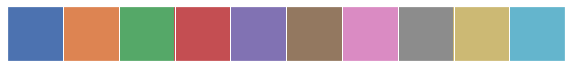

In [4]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [16]:
#titannic=sns.load_dataset('titanic'); #engine='python'
#titannic.head()
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load a dataset from the online repository (requires internet).
    
    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn-data/
    kws : dict, optional
        Passed to pandas.read_csv



In [5]:
df_iris=sns.load_dataset('iris')
df_iris.head()

URLError: <urlopen error [Errno 111] Connection refused>

In [36]:
titanic = pd.read_csv("http://y.biomooc.com/wangjl/docs/seaborn-data/titanic.csv")
print(titanic.shape) #(891, 15)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

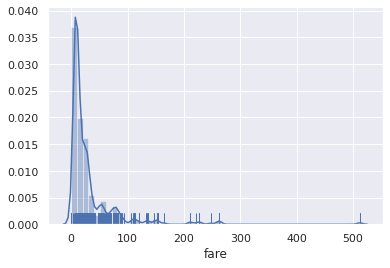

In [28]:
sns.distplot(titanic['fare'], kde = True, rug=True)  #ax = 'pclass', kde = True, rug = True

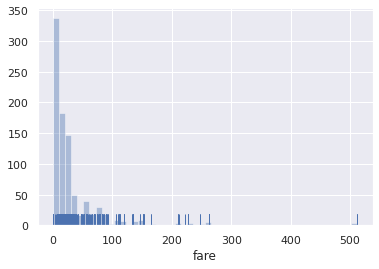

In [29]:
sns.distplot(titanic['fare'], kde = False, rug=True) 

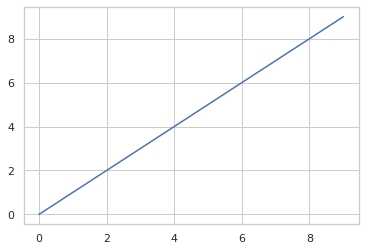

In [13]:
sns.set_style("whitegrid") 
plt.plot(np.arange(10))  
plt.show()  

In [37]:
#查看不同等级仓，不同性别 乘客的生存情况
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [47]:
#可以按照2列进行groupby
#titanic.groupby(['sex','class'])['embark_town'].agg(pv=np.sum)
rs=titanic.groupby(['sex','class'])['survived'].agg(np.sum)
rs

sex     class 
female  First     91
        Second    70
        Third     72
male    First     45
        Second    17
        Third     47
Name: survived, dtype: int64

In [49]:
rs_2=rs.unstack()
rs_2

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


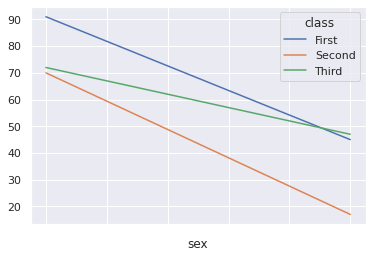

In [50]:
rs_2.plot()